In [55]:
import local_models.local_models as local_models
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
reload(local_models)
mpl.rcParams['figure.figsize'] = [8.0, 8.0]
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = True
np.random.seed(1)

In [20]:
n = 100
sigma = 0.05
k = 15

In [21]:
X1 = np.linspace(1.,3.,n)
X2 = np.linspace(0.,2.,n)

In [22]:
y1 = -3*X1 + 8 + np.random.normal(0,sigma,n)

In [23]:
y2 = -3*X2 + 0 + np.random.normal(0,sigma,n)

In [24]:
colors = np.concatenate((np.ones(n), np.zeros(n)))

In [25]:
y = np.concatenate((y1,y2))
x = np.concatenate((X1,X2))

In [26]:
print(x.shape, y.shape)

(200,) (200,)


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


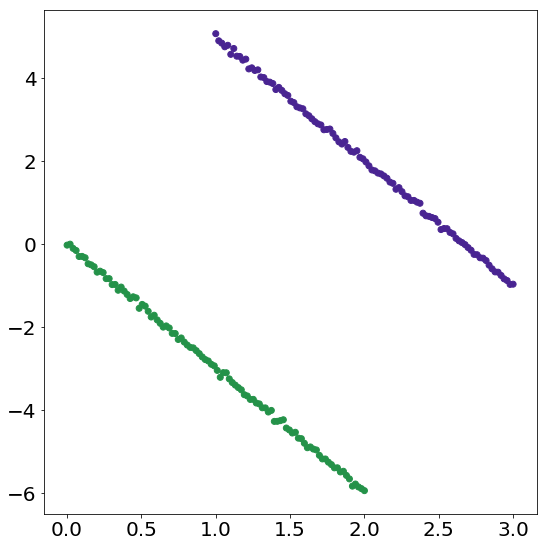

In [27]:
plt.scatter(x,y,c=cmap(colors))
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


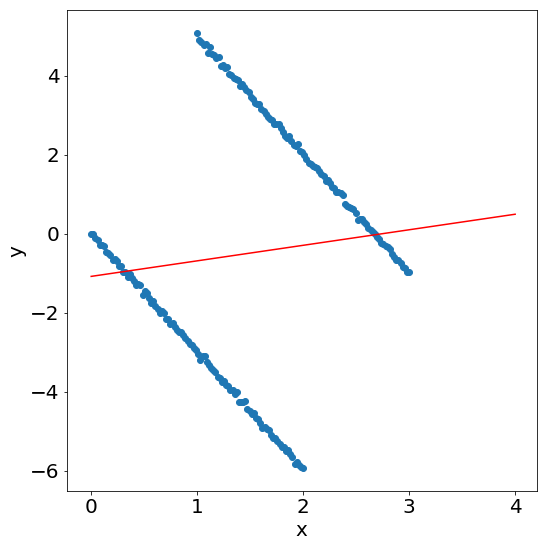

In [28]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(x.reshape((-1,1)),y)
xx = np.linspace(0,4,100)
pred = lr.predict(xx.reshape((-1,1)))
plt.plot(xx, pred, c='r')
plt.scatter(x,y)#,c=cmap(colors))
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("parallel_lines_w_regression.png")
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


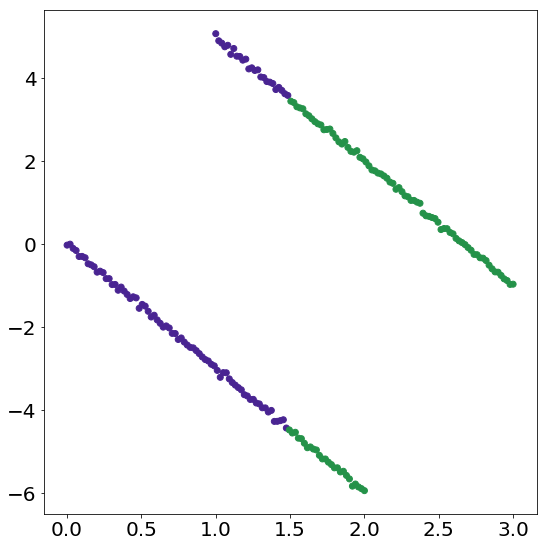

In [29]:
km = sklearn.cluster.KMeans(2)
km.fit(x.reshape((-1,1)))
pred = km.predict(x.reshape((-1,1)))
plt.scatter(x,y,c=cmap(pred))
plt.show()

In [30]:
models = local_models.LocalModels(sklearn.linear_model.LinearRegression())

In [31]:
models.fit(x.reshape((-1,1)), y, np.stack((x,y)).T)

In [32]:
lm_params = models.transform(np.stack((x,y)).T,k=k)

In [33]:
lr.__dict__

{'_residues': 1837.8459646668707,
 'coef_': array([0.39331917]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': -1.0846443187663142,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 1,
 'singular_': array([10.86340039])}

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


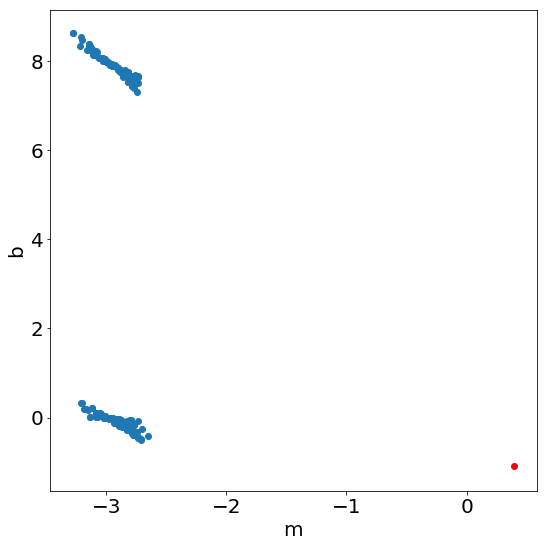

In [40]:
plt.scatter(lm_params[:,0], lm_params[:,1])
plt.scatter([lr.coef_], [lr.intercept_], c='r')
plt.xlabel('m')
plt.ylabel('b')
plt.savefig('parallel_lines_local_linear_feature_transform.png')
plt.show()

In [41]:
clf = sklearn.cluster.KMeans(2)

In [42]:
clf.fit(lm_params)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


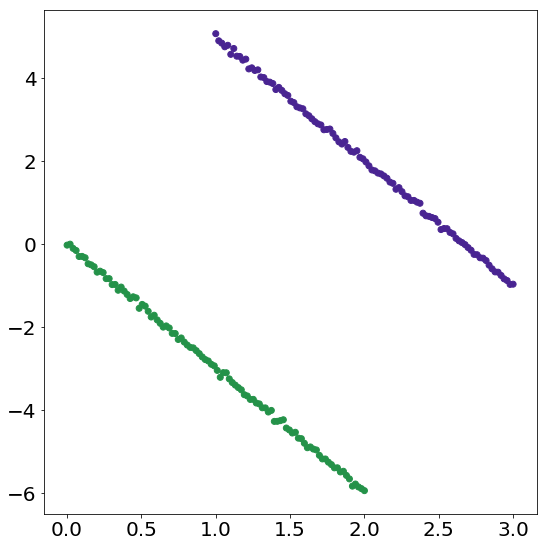

In [43]:
plt.scatter(x,y,c=cmap(clf.predict(lm_params)))
plt.show()

In [44]:
g = np.mgrid[0:4:0.02, -6:6:0.06]
xx = np.vstack(map(np.ravel, g)).T

In [45]:
pred = clf.predict(models.transform(xx,k=k))

In [46]:
pred.shape

(40000,)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


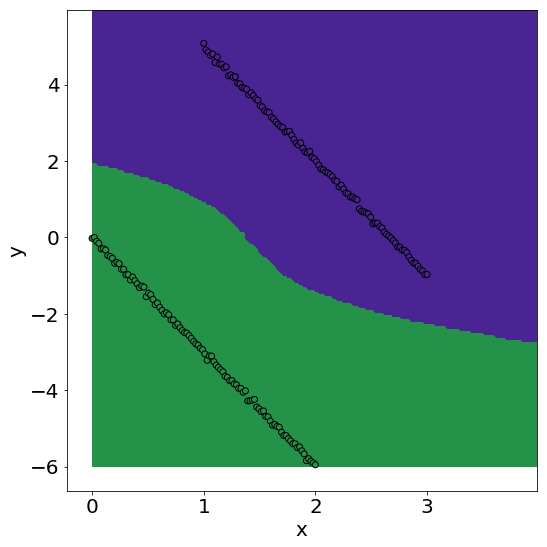

In [56]:
cc = np.array(list(map(mpl.colors.to_rgb, np.unique(cmap(pred)))))
plt.contourf(g[0], g[1], pred.reshape(g[0].shape), 1, colors=cc)
plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('parallel_lines_kmeans_w_local_linear_features.png')
plt.show()

In [48]:
clf2 = sklearn.cluster.KMeans(2)

In [49]:
clf2.fit(np.stack((x,y)).T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
pred2 = clf2.predict(xx)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


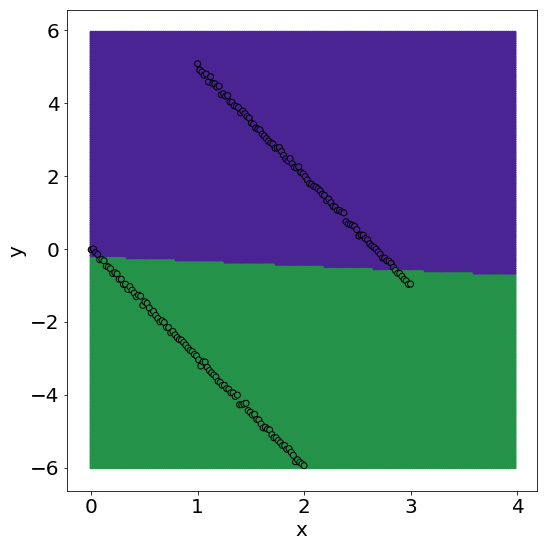

In [57]:
plt.scatter(xx[:,0], xx[:,1], c=cmap(pred2), s=6)
plt.scatter(x,y, c=cmap(clf2.predict(np.stack((x,y)).T)), linewidths=1, edgecolors="k")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('parallel_lines_kmeans.png')
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

In [93]:
print(animation.writers.list())

['imagemagick_file', 'ffmpeg_file', 'imagemagick', 'ffmpeg', 'html']


In [ ]:
xdata, ydata = x, y
offsets = np.stack((xdata, ydata)).T
multioffsets = []
for i in range(100):
    offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
    multioffsets.append(np.copy(offsets))

fig = plt.figure()
decision_surface = plt.scatter(xx[:,0], xx[:,1], c=cmap(pred), s=6, animated=True)
scat = plt.scatter(x,y, c=cmap(clf.predict(lm_params)), linewidths=1, edgecolors='k', animated=True)

def init():
    return scat, decision_surface

def update(frame):
    offsets = multioffsets[frame]
    models.fit(offsets[:,:1], offsets[:,1:], offsets)
    pred = clf.predict(models.transform(xx,k=k))
    decision_surface.set_color(cmap(pred))
    scat.set_offsets(np.copy(multioffsets[frame]))
    return scat, decision_surface


ani = FuncAnimation(fig, update, frames=range(100),
                    init_func=init, blit=True)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='CScott!'), bitrate=1800)
ani.save('ani_k10_double.mp4', writer=writer)

HTML(ani.to_html5_video())
#offsets[:,1] += np.random.normal(0,0.05,offsets.shape[0])
#scat.set_offsets(offsets)
#scat